# Spring Winding Lab

**Objective:** become familiar with a basic wire forming process as well as part to part variation in manufacturing by designing and manufacturing a number of springs to meet predefined objectives.

**Method:** design springs following the procedure below, manufacture multiples of the same spring design, investigate part to part variability by testing the stiffness of the springs and calculating basic statistical parameters.

**Note:** refer to the lab manual that is posted on Canvas for this lab activity. If there are discrepancies between this notebook and the lab manual, defer to the lab manual.

**Hint:** use this notebook as a starting point and edit/modify as you see fit. Review the whole sheet before you get started, there is a little hint at the end that might be useful. 

### Safety, Material and Equipment

Safety glasses are extremely important in this lab due the use of sharp wire.

Hazards include: 
Sharp wire <br>
Wire offcut projectiles <br>
Wire cutting tool <br>
Pinch hazard between wire and mandrel <br>

```{figure} SpringTools.png
---
height: 300px
name: SpringTools
---
Tools and materials used in the lab

```{figure} SpringEquipment.png
---
height: 250px
name: SpringEquipment
---
Equipment used in the lab


## Spring Stiffness Calculations

A spring's stiffness or 'rate', $k$ is defined as the amount of load to deflect the spring by a certain amount. This is typically reported at $N/m$ or $lb/in$. <br>

Stiffness can be calculated with the following equation: <br>
$k = \frac{d^4G}{8D^3N_a}$ ...(1)<br>

Where:<br>
$d$ is the wire diameter ($m$ or more commonly $mm$)<br>
$G$ is the shear modulus of the wire material ($Pa$ or more commonly $GPa$)<br>
$D$ is the average spring diameter ($OD_{spring} - d$) ($m$ or more commonly $mm$)<br>
$N_a$ is the number of active coils in the spring <br>
<br>
For our lab activity, we would like to calculate the number of active coils required to acheive a desired spring stiffness. We can rearrange (1) to get (2): <br>
$N_a = \frac{d^4G}{8D^3k}$ ...(2)<br>



## Follow the procedure below to complete the lab activity

Choose an objective from one of the design scenarios below. Each member of your group will choose a different scenario.
1) Calculate the desired spring stiffness.
2) Calculate the number of active coils in the spring to acheive the desired stiffness.
3) Make the spring you designed and allow all group members to make theirs.
4) Compare the springs made by your group and select one (design) to work with.
5) Have every group member make a spring of that design.  
6) Measure the spring stiffness of each of the (nominally) identical springs.
7) Compare the variation in spring stiffness.
8) Prepare and submit your lab report.

The following mandrel sizes are available:
12 $mm$
18 $mm$
25 $mm$

The following wire gages are available:
1 $mm$
1.25 $mm$
1.5 $mm$

The wire material is 304 Stainless Steel.

Be aware that the springs will 'spring back' or unwind slightly after they are wound around the mandrels. The table below shows experimental data of the resulting outside diameter of various gage/mandrel combinations. Use this as the starting point in your calculations.  

| Gage/Mandrel | 12 mm | 18 mm | 25 mm |
|-------------|-------|-------|-------|
| 1 mm       | 17.1  | 31.2  | 52.4  |
| 1.25 mm    | 15.8  | 27.8  | 43.7  |
| 1.5 mm     | 15.4  | 25.8  | 41.5

**Design Scenarios** <br>

Each member in your group will select a different design scenario and design their own spring using the procedure below. <br>

**Scenario #1:** Design a spring that will hold a piston in a $20 mm$ diameter cylinder. The mass of the piston is $500 g$ and it must deflect approximately $8 mm$.

**Scenario #2:** Design a spring that is as short as possible and will hold a mass of $250 g$ and deflect approximately $5 mm$ with at least one active coil.

**Scenario #3** Design the stiffest spring possible with three or more active coils.

**Scenario #4:** Design a spring that will hold $5 N$ with approximately $15 mm$ of deflection using the smallest mandrel and wire gage.

**Scenario #5:** Design a spring that will hold $1 N$ with approximately $10 mm$ of deflection using the largest mandrel and wire gage.

**Scenario #6:** Design the softest spring possible with five or less active coils. 

### 0. Import packages and define variables

In [1]:
#import packages

import pandas as pd
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

#Define variables
G = 70 * 1e9 #Pa (shear modulus of 304 stainless steel, note: G is typically reported in GPa)

#refer to the table above for available wire gages
d = 1.5 / 1000 #m, wire gage (diameter)

#D is the result of a combination of wire gage and mandrel diameter, select select it from the table above
D = (41.85 - d) / 1000 #m, average spring diameter, which is equal to the OD of the spring minus the wire diameter

### 1. Calculate the desired spring stiffness


In [2]:
#Define variables
F = (100 / 1000) * 9.81 #N, input the load/force the spring must exert
s = 10 / 1000 #m, spring deflection, input the desired displacement of the spring under said load

#Calculate spring stiffness
k = F / s #N/m
print('Spring stiffness =', round(k),' N/m')

Spring stiffness = 98  N/m


### 2. Calculate the number of active coils

In [3]:
#Calculate the number of coils required to obtain desired spring stiffness

Na = (d**4 * G) / (8 * D**3 * k)
print('Na = ', round(Na, 1), 'turns')

#NOTE: PLEASE KEEP THE NUMBER OF ACTIVE COILS BELOW TEN FOR PRACTICAL REASONS

Na =  6.2 turns


### 3. Make springs

Now that you have a design, make your spring using the spring winding apparatus. This video will show you how to perform this task:
https://youtu.be/x1HTJAbvkuo 

Each student is responsible for one spring design, for making and measuring that design, and for making and measuring each of their group member’s designs. For example, in a team of five students, each student will make five springs of different designs.

```{figure} SpringWindingVideo.png
---
height: 150px
name: SpringWindingVideo
---
Spring winding video QR code



### 4. Measure spring stiffness

The stiffness of Spring 1 is 297.35 N/m


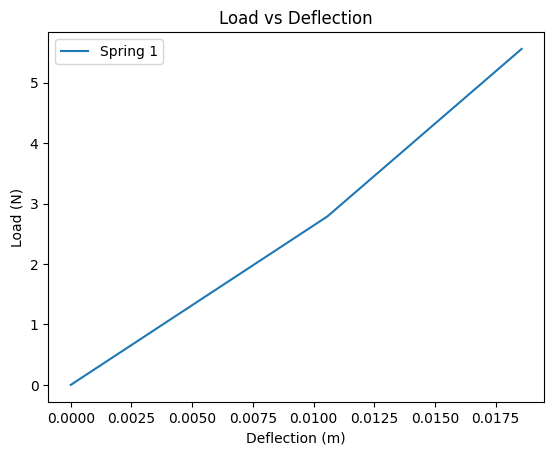

In [4]:
# Spring stiffness measurement 
# Use this code to help analyze your spring stiffness data and calculate k

# Define your spring name
SpringName = 'Spring 1'

# Create a dataframe to put measured data in
# Specify column names
columns = ['Load_(N)', 'Deflection_(m)']

# Input the measured data in a two column array where the first column is load and the second is displacement
# **NOTE: keep track of your units, in this example we are inputting g and mm then converting to N and m 
data = [
    [0, 0],
    [284 , 10.57],
    [282.4 + 284, 18.57]
]

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Convert mass to force
df['Load_(N)'] = df['Load_(N)'] / 1000 * 9.81

# Convert displacement to m
df['Deflection_(m)'] = df['Deflection_(m)'] / 1000

# Find the slope of load vs displacement, this is the spring constant, k
slopeD, intercept = np.polyfit(df["Deflection_(m)"], df["Load_(N)"], 1)
print('The stiffness of', SpringName, 'is', round(slopeD,2), 'N/m')

# Plot the data
df.plot(x = "Deflection_(m)", y="Load_(N)", kind="line", label = SpringName)
plt.xlabel("Deflection (m)")
plt.ylabel("Load (N)")
plt.title("Load vs Deflection")

# Show the plot
plt.show()

### 5. Compare the stiffness of your group's batch of springs



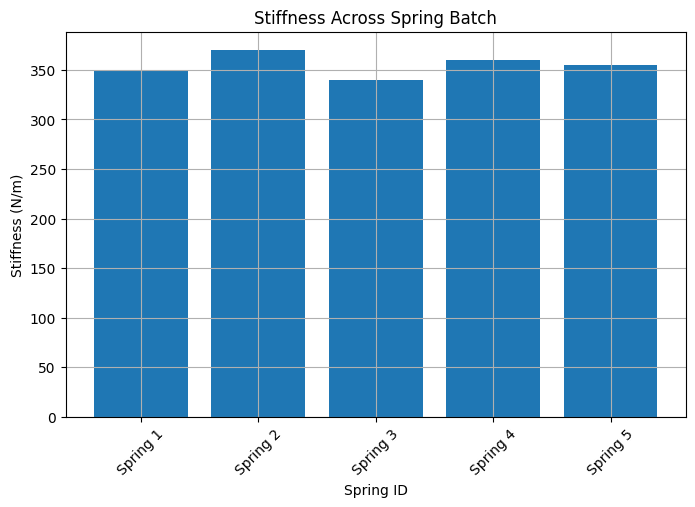

Mean Stiffness: 355.00 N/m
Standard Deviation: 11.18 N/m
Minimum Stiffness: 340.00 N/m
Maximum Stiffness: 370.00 N/m
Coefficient of Variation: 3.15%


In [5]:
# Input stiffness values for the five springs your group made and tested
data = {
    "Spring_ID": ["Spring 1", "Spring 2", "Spring 3", "Spring 4", "Spring 5"], # Spring names
    "Stiffness_k": [350, 370, 340, 360, 355]  # Stiffness in N/m
}

# Put that data into a Pandas data frame
df_k = pd.DataFrame(data)

# Create a bar chart of stiffnesses
plt.figure(figsize=(8,5))
plt.bar(x = "Spring_ID", height = "Stiffness_k", data = df_k)
plt.xlabel("Spring ID")
plt.ylabel("Stiffness (N/m)")
plt.title("Stiffness Across Spring Batch")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Compute statistics
mean_k = df_k["Stiffness_k"].mean()
std_k = df_k["Stiffness_k"].std()
min_k = df_k["Stiffness_k"].min()
max_k = df_k["Stiffness_k"].max()
cv_k = std_k / mean_k  # Coefficient of Variation (CV)

# Print results
print(f"Mean Stiffness: {mean_k:.2f} N/m")
print(f"Standard Deviation: {std_k:.2f} N/m")
print(f"Minimum Stiffness: {min_k:.2f} N/m")
print(f"Maximum Stiffness: {max_k:.2f} N/m")
print(f"Coefficient of Variation: {cv_k:.2%}")


### 6. Complete the lab report

Complete a lab report using the standard MANU 230 template. Please include the following: <br> 
-Details of your design <br> 
-The statistics calculated in Step 5 above <br> 
-Potential sources of part to part variation<br> 
-Comment on the repeatability of your group's springs based on the statistics (was each spring close or were they quite off?) <br> 

Please submit a copy of this notebook file with your report. 

Refer to the lab manual posted on Canvas. If there are discrepancies between this notebook and the lab manual defer to the lab manual. 

#### Helpful Hint

For Step 5 you are asked to collaborate and bring your data together. One way to share you data is to create a shared spreadsheet document where everyone can enter their data, then you can export it as a CSV file and use the Pandas `read_csv` function to import it as a data frame then go from there. Below is some example code.

   Spring1Load  Spring1Def  Spring2Load  Spring2Def  Spring3Load  Spring3Def
0        200.0        20.0        250.0        10.0          170          22
1        400.0        40.0        300.0        30.0          340          44
2        600.0        60.0        350.0        50.0          510          66
3        800.0        80.0          NaN         NaN          680          88
4          NaN         NaN          NaN         NaN          850         110
The mean load of Spring 3 is 510.0 N


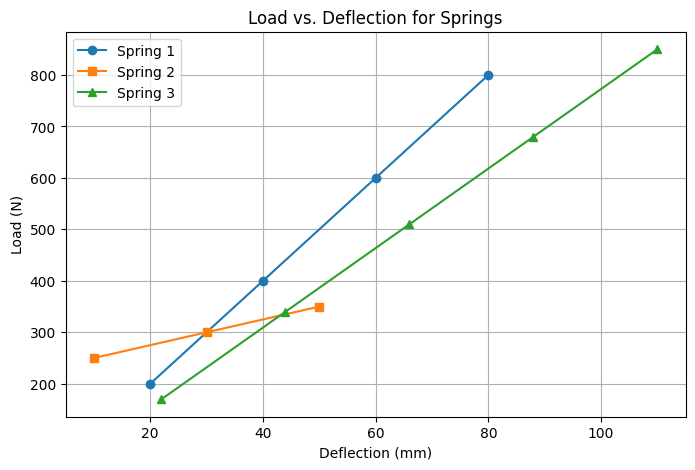

In [6]:
# Load the CSV file containing everyone's data
SpringStats = pd.read_csv("SpringStats.csv")

# Print/display the data frame to review what it contains (note: NaN means not a number or in this case, an empty cell)
print(SpringStats)

# Here is an example of finding the mean of a row (not sure why you'd want the mean load but...)
mean_load = SpringStats["Spring3Load"].mean()
print('The mean load of Spring 3 is', mean_load, 'N')


# You could also plot everyone's data if you so desired

# Create a plot
plt.figure(figsize=(8, 5))

# Plot each spring's data (dropping NaNs)
plt.plot(SpringStats["Spring1Def"], SpringStats["Spring1Load"], marker='o', label="Spring 1")
plt.plot(SpringStats["Spring2Def"], SpringStats["Spring2Load"], marker='s', label="Spring 2")
plt.plot(SpringStats["Spring3Def"], SpringStats["Spring3Load"], marker='^', label="Spring 3")

# Labels and title
plt.xlabel("Deflection (mm)")
plt.ylabel("Load (N)")
plt.title("Load vs. Deflection for Springs")
plt.legend()
plt.grid(True)

# Show plot
plt.show()
